# **User Segmentation using K-Means**

# Data Preprocessing

## Importing the libraries

In [32]:
#numpy for arrays, matplotlib for visualization, pandas to read and transform data from csv or xls files
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

## Importing Dataset

In [33]:
data_set = pd.read_csv('AmazonUserSegmentation.csv')

In [34]:
#Taking only Income and rating columns
X_I = data_set.iloc[:, 3:5].values

In [35]:
print(X_I[0:2,:])

[[306555     44]
 [306555     91]]


In [36]:
#Taking only Age and Rating columns
X_A=data_set.iloc[:,[2,4]].values

In [37]:
print(X_A)

[[ 23  44]
 [ 26  91]
 [ 24   7]
 [ 28  87]
 [ 38  45]
 [ 27  86]
 [ 42   7]
 [ 28 106]
 [ 77   4]
 [ 36  81]
 [ 81  16]
 [ 42 111]
 [ 70  17]
 [ 29  87]
 [ 45  15]
 [ 27  89]
 [ 42  40]
 [ 24  74]
 [ 63  33]
 [ 42 110]
 [ 42  40]
 [ 30  82]
 [ 56   6]
 [ 38  82]
 [ 65  16]
 [ 35  92]
 [ 54  36]
 [ 42  69]
 [ 48  35]
 [ 28  98]
 [ 72   5]
 [ 26  82]
 [ 64   5]
 [ 22 104]
 [ 59  16]
 [ 26  91]
 [ 51  20]
 [ 36  82]
 [ 44  30]
 [ 24  84]
 [ 78  40]
 [ 29 104]
 [ 58  41]
 [ 38  69]
 [ 59  32]
 [ 29  73]
 [ 60  62]
 [ 33  53]
 [ 35  48]
 [ 38  48]
 [ 59  59]
 [ 40  68]
 [ 38  61]
 [ 71  68]
 [ 60  51]
 [ 57  46]
 [ 62  56]
 [ 83  52]
 [ 33  58]
 [ 64  52]
 [ 84  63]
 [ 23  62]
 [ 81  59]
 [ 65  67]
 [ 76  58]
 [ 22  67]
 [ 52  56]
 [ 82  54]
 [ 23  67]
 [ 39  53]
 [ 84  62]
 [ 57  48]
 [ 72  55]
 [ 72  63]
 [ 71  53]
 [ 32  61]
 [ 54  60]
 [ 48  54]
 [ 28  59]
 [ 59  48]
 [ 69  58]
 [ 46  62]
 [ 81  46]
 [ 56  50]
 [ 26  64]
 [ 58  52]
 [ 66  65]
 [ 27  62]
 [ 41  68]
 [ 60  52]
 [ 82  62]

**Finding optimal number of clusters via elbow method**

**(A) For Income and Purchase rating Data**

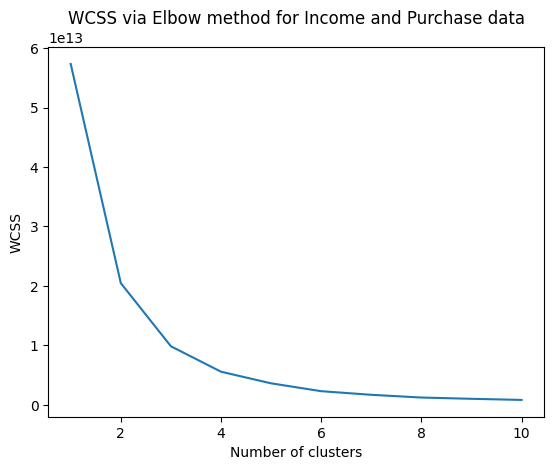

In [38]:
from sklearn.cluster import KMeans
#For storing WCSS (Within-cluster-sum-of-squares)
wcss_I=[]

for i in range(1,11):
  KIMeans=KMeans(n_clusters=i, init='k-means++', random_state=25)
  KIMeans.fit(X_I)
  wcss_I.append(KIMeans.inertia_)

plt.plot(range(1,11),wcss_I)
plt.title('WCSS via Elbow method for Income and Purchase data')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

**(B) For Age and Purchase Rating Data**

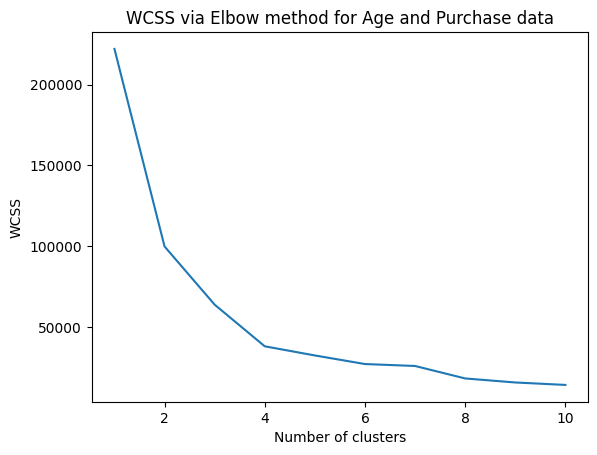

In [39]:
wcss_A=[]

for j in range(1,11):
  KAMeans=KMeans(n_clusters=j, init='k-means++', random_state=25)
  KAMeans.fit(X_A)
  wcss_A.append(KAMeans.inertia_)

plt.plot(range(1,11),wcss_A)
plt.title('WCSS via Elbow method for Age and Purchase data')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

**K-Means Model Training**

**(A) For Income and Purchase rating Data**

In [40]:
KIMeans=KMeans(n_clusters=4,init='k-means++',random_state=27)
YIMeans=KIMeans.fit_predict(X_I)

In [41]:
print(YIMeans)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


**(B) For Age and Purchase Rating Data**

In [42]:
KAMeans=KMeans(n_clusters=4,init='k-means++',random_state=27)
YAMeans=KAMeans.fit_predict(X_A)

In [43]:
print(YAMeans)

[3 1 2 1 3 1 2 1 2 1 2 1 2 1 2 1 3 3 2 1 3 1 2 1 2 1 2 3 2 1 2 1 2 1 2 1 2
 1 2 1 0 1 0 3 2 3 0 3 3 3 0 3 3 0 0 0 0 0 3 0 0 3 0 0 0 3 0 0 3 3 0 0 0 0
 0 3 0 3 3 0 0 3 0 0 3 0 0 3 3 0 0 3 0 3 3 3 0 3 0 3 3 0 0 3 0 3 0 0 0 0 0
 3 3 3 3 3 0 0 0 0 3 3 3 1 3 1 0 1 2 1 2 1 3 1 2 1 2 1 2 1 2 1 3 1 2 1 0 1
 2 1 2 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1 2 1 2 3 2 1 2 1 2 1 2 1 2 1 2 1 2 1 0
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


**Visualising Clusters**

**(A) For Income and Purchase rating Data**

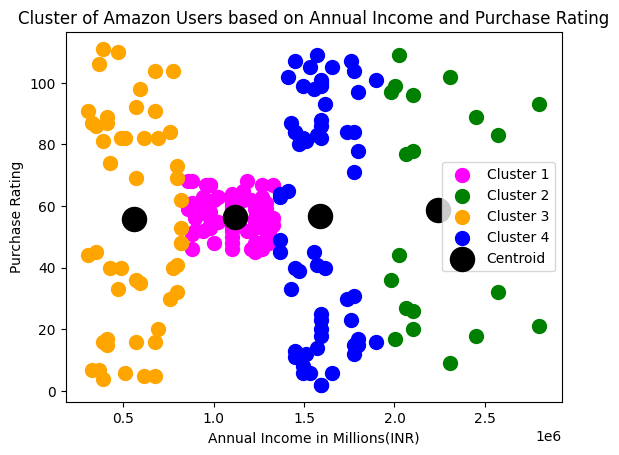

In [44]:
plt.scatter(X_I[YIMeans==0,0], X[YIMeans==0,1],s=100,c='magenta',label='Cluster 1')
plt.scatter(X_I[YIMeans==1,0], X[YIMeans==1,1],s=100,c='green',label='Cluster 2')
plt.scatter(X_I[YIMeans==2,0], X[YIMeans==2,1],s=100,c='orange',label='Cluster 3')
plt.scatter(X_I[YIMeans==3,0], X[YIMeans==3,1],s=100,c='blue',label='Cluster 4')
plt.scatter(KIMeans.cluster_centers_[:,0],KIMeans.cluster_centers_[:,1],s=300,c='black',label='Centroid')
plt.title('Cluster of Amazon Users based on Annual Income and Purchase Rating')
plt.xlabel('Annual Income in Millions(INR)')
plt.ylabel('Purchase Rating')
plt.legend()
plt.show()

**(B) For Age and Purchase Rating Data**

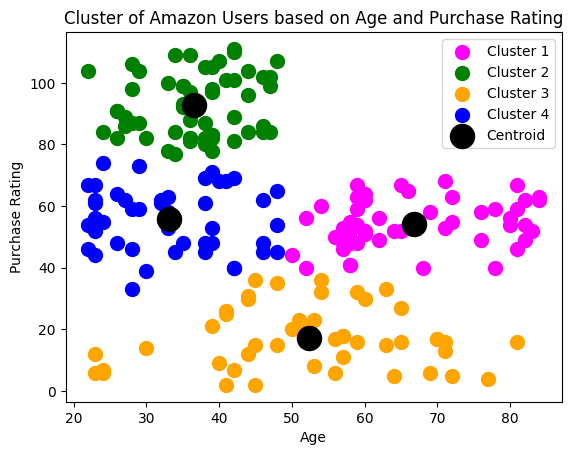

In [45]:
plt.scatter(X_A[YAMeans==0,0], X[YAMeans==0,1],s=100,c='magenta',label='Cluster 1')
plt.scatter(X_A[YAMeans==1,0], X[YAMeans==1,1],s=100,c='green',label='Cluster 2')
plt.scatter(X_A[YAMeans==2,0], X[YAMeans==2,1],s=100,c='orange',label='Cluster 3')
plt.scatter(X_A[YAMeans==3,0], X[YAMeans==3,1],s=100,c='blue',label='Cluster 4')
plt.scatter(KAMeans.cluster_centers_[:,0],KAMeans.cluster_centers_[:,1],s=300,c='black',label='Centroid')
plt.title('Cluster of Amazon Users based on Age and Purchase Rating')
plt.xlabel('Age')
plt.ylabel('Purchase Rating')
plt.legend()
plt.show()